In [1]:
import matplotlib.pyplot as plt
import numpy as np

from helpers import read_mnist, format_data, iterate_minibatches, split_data
from nn import NeuralNetwork

# Read data

In [2]:
ims, labels, a, t = read_mnist()

In [3]:
X, y = format_data(ims, labels)

In [4]:
X_train, y_train, X_val, y_val = split_data(X, y)

## Test training

In [5]:
nn = NeuralNetwork(layers=[784, 400, 200, 10])

In [6]:
def accuracy(pred, y):
    return np.mean(np.argmax(pred,axis=1)==np.argmax(y, axis=1))

In [7]:
from tqdm import tqdm
epochs = 200
batch_size = 200

accuracy_train = []
accuracy_val = []
t = tqdm(range(epochs), leave=False)
for i in t:
    for batch in iterate_minibatches(X_train, y_train, batch_size):
        x_batch, y_batch = batch
        nn.backward(x_batch, y_batch)
        
    # Train accuracy.
    yhat_train, _, _ = nn.forward(X_train)
    acc_train = accuracy(yhat_train, y_train)
    accuracy_train.append(acc_train)

    # Validation accuracy.
    yhat_val, _, _ = nn.forward(X_val)
    acc_val = accuracy(yhat_val, y_val)
    accuracy_val.append(acc_val)

    t.set_description("Train acc.:{:.2f}, Val acc.:{:.2f}".format(acc_train, acc_val))

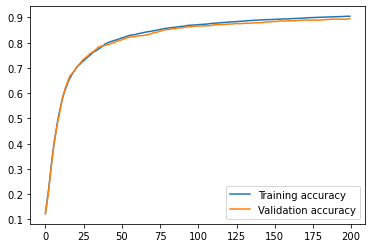

In [8]:
plt.figure()
plt.plot(accuracy_train, label="Training accuracy")
plt.plot(accuracy_val, label="Validation accuracy")
plt.legend()
plt.show()